CZĘŚĆ PIERWSZA

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [2]:
import numpy as np
import tensorflow as tf

train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_ds = train_ds.shuffle(1000).batch(32)

In [4]:
f_mnist_model = tf.keras.Sequential([
    layers.Flatten(),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(50, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004)

f_mnist_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [6]:
f_mnist_model.fit(train_ds, epochs=25, verbose=1)

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7761 - loss: 0.6326
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8572 - loss: 0.3819
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8739 - loss: 0.3417
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8794 - loss: 0.3188
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8866 - loss: 0.2994
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8929 - loss: 0.2836
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8966 - loss: 0.2708
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9029 - loss: 0.2598
Epoch 9/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9085 - loss: 0.2440
Epoch 10/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9119 - loss: 0.2334
Epoch 11/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9129 - loss: 0.2258
Epoch 12/25
1688/16

CZĘŚĆ DRUGA

In [7]:
f_mnist_model.save('fashion_mnist_model.keras')

In [17]:
saved_model = tf.keras.models.load_model('fashion_mnist_model.keras')

In [9]:
import matplotlib.pyplot as plt

In [10]:
def predict_and_display(image):

    image = np.expand_dims(image, axis=0)

    prediction = saved_model.predict(image)
    predicted_label = np.argmax(prediction)

    plt.imshow(image.squeeze())
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


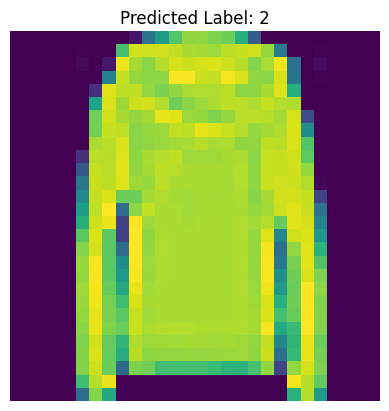

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


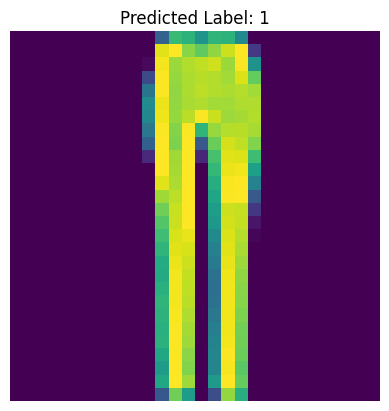

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


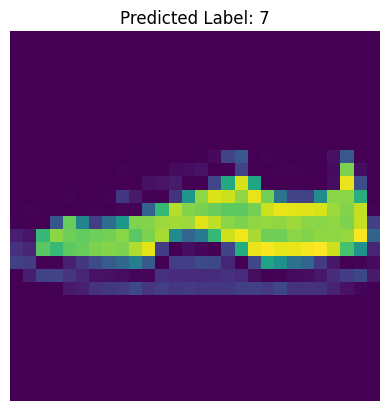

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


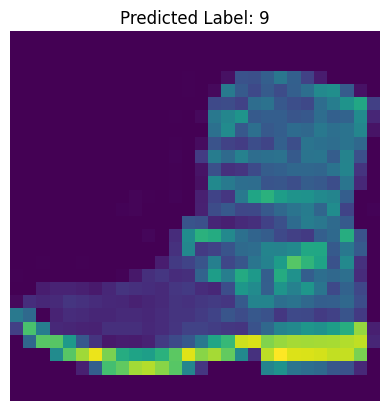

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


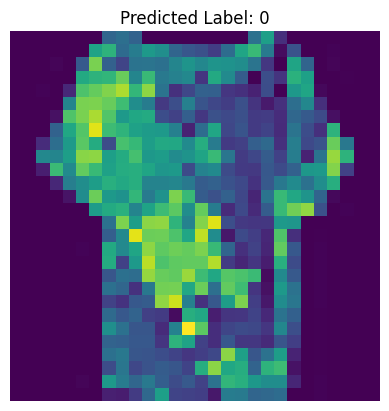

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


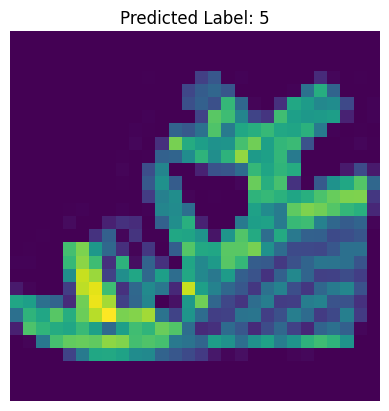

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


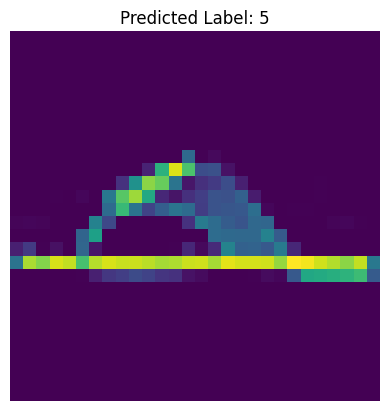

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


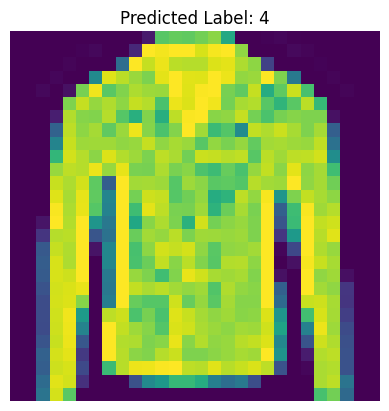

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


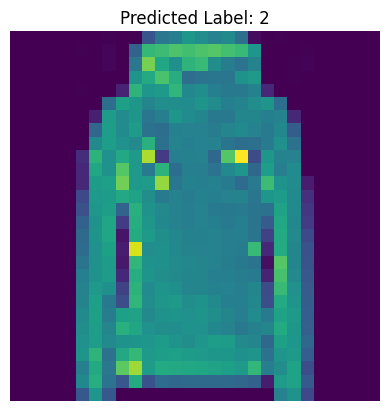

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


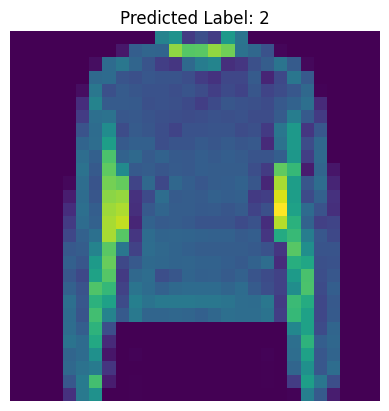

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


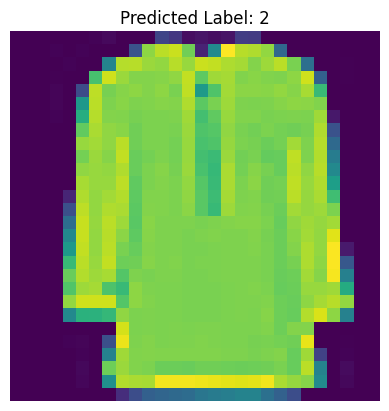

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


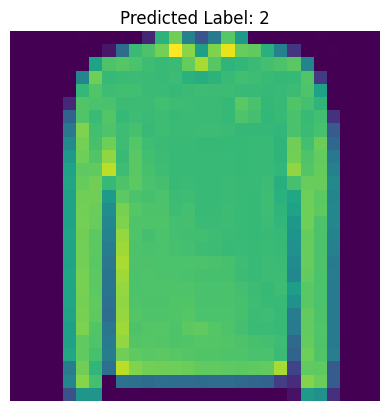

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


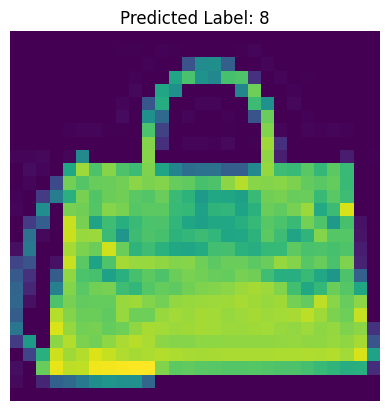

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


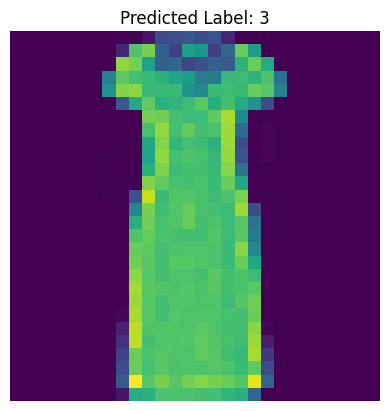

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


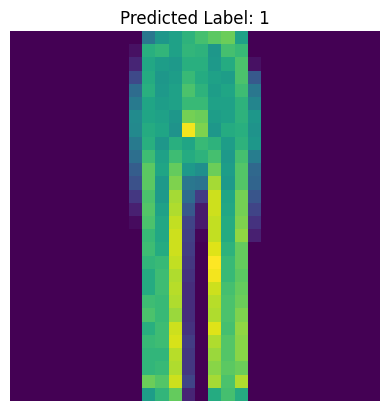

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


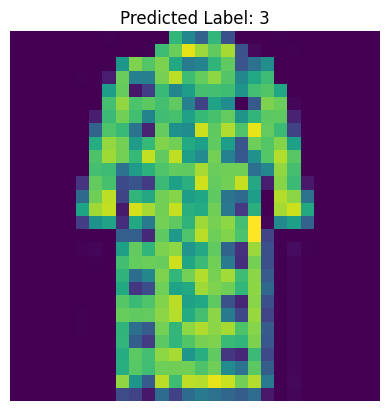

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


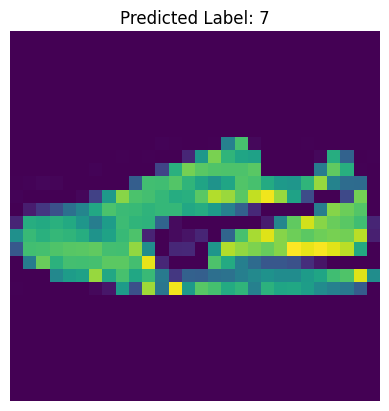

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


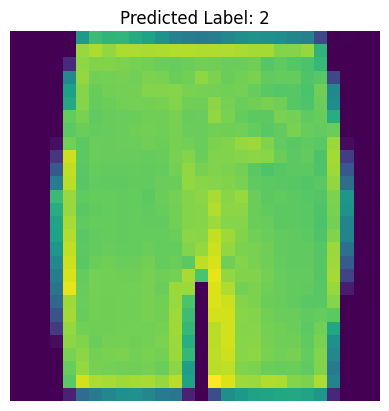

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


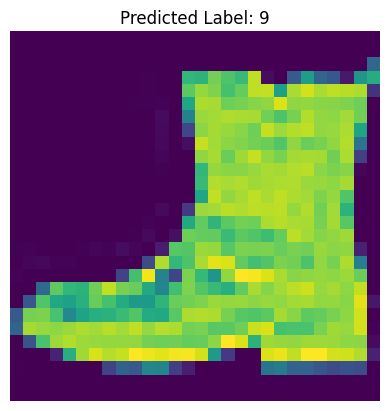

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


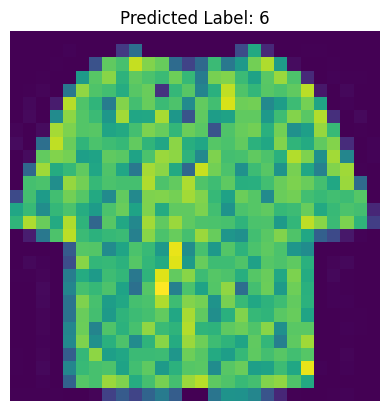

In [11]:
#Let's see the function for the first 20 test examples

for i in range(20):
    predict_and_display(X_test[i])

CZĘŚĆ TRZECIA

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, min_lr=5e-6)

In [18]:
datagen = ImageDataGenerator(
    width_shift_range=0.01,
    height_shift_range=0.01,
    shear_range=0.01,
    zoom_range=0.01,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='constant')

datagen.fit(X_train)

saved_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=70, verbose=1, callbacks=[lr_scheduler])

Epoch 1/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8734 - loss: 0.4003 - learning_rate: 0.0010
Epoch 2/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8995 - loss: 0.2698 - learning_rate: 0.0010
Epoch 3/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9044 - loss: 0.2598 - learning_rate: 0.0010
Epoch 4/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9034 - loss: 0.2509 - learning_rate: 0.0010
Epoch 5/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9116 - loss: 0.2379 - learning_rate: 0.0010
Epoch 6/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9091 - loss: 0.2396 - learning_rate: 0.0010
Epoch 7/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9139 - loss: 0.2284 - learning_rate: 0.0010
Epoch 8/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9130 - loss: 0.2313 - learning_rate: 0.0010
Epoch 9/70
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9170 - loss: 0.219

Z wystarczającą ilością epok byłam w stanie osiągnąć accuracy 97%. Niestety, samo image augmentation nie pomogło - trzeba było dodać dużą ilość epok, jak i stworzyć learning rate scheduler. Może mieć to sens, że z większą ilością danych komputer potrzebuje więcej czasu (epok), by zrozumieć dane, lecz mimo to nie powiedziałabym, że image segmentation bardzo pomogło naszej sieci w klasyfikacji ubrań.